<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In this tutorial we will see how to use logistic regression for multiclass classification. 

##### Load the digits dataset from scikit-learn using the load_digits function. The dataset contains images of handwritten digits (8x8 pixels) along with their corresponding labels (integer values 0-9).

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

##### DESCR: A description of the dataset. 
##### data: The data containing the pixel values of the images. 
##### target: The target labels corresponding to the images. 
##### target_names: The names of the target classes.

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 640x480 with 0 Axes>

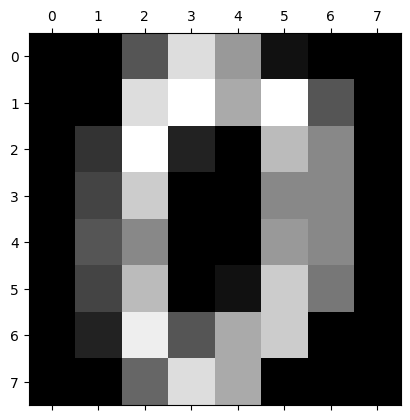

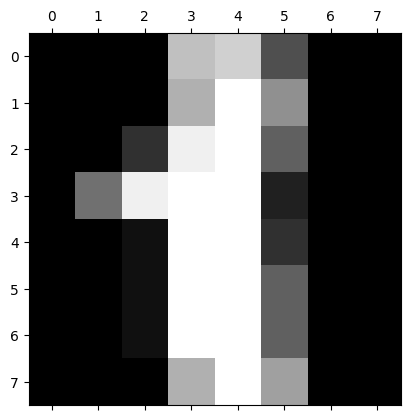

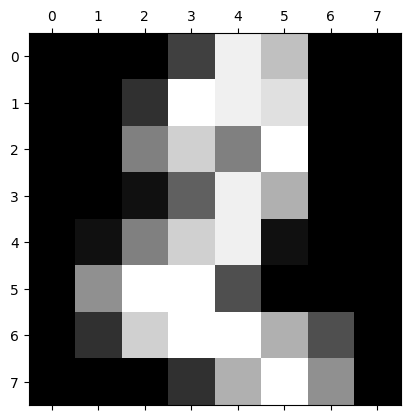

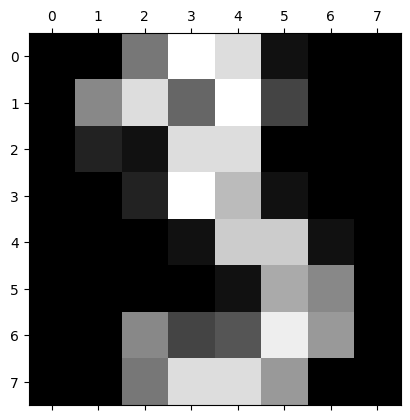

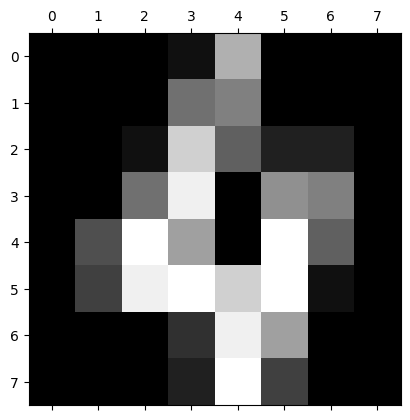

In [4]:
# Set the colormap to grayscale
plt.gray() 
# Plot the first five images
for i in range(5):
    plt.matshow(digits.images[i]) 

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [9]:
model.fit(X_train, y_train)

C:\Users\jisma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [10]:
model.score(X_test, y_test)

0.9583333333333334

In [11]:
# predict the labels for the first five samples in the digits dataset using your trained logistic regression model (model)
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [12]:
y_predicted = model.predict(X_test)

In [13]:
y_predicted

array([3, 6, 8, 8, 3, 7, 3, 1, 2, 5, 8, 5, 5, 4, 6, 0, 2, 2, 4, 8, 6, 0,
       2, 4, 5, 7, 4, 8, 2, 9, 4, 9, 5, 6, 2, 1, 1, 3, 2, 0, 9, 6, 0, 1,
       3, 5, 8, 0, 6, 4, 4, 2, 9, 0, 6, 4, 9, 8, 2, 0, 3, 3, 6, 4, 4, 7,
       5, 7, 9, 5, 2, 6, 2, 2, 5, 1, 3, 8, 3, 0, 3, 7, 3, 9, 1, 2, 7, 1,
       5, 3, 6, 2, 9, 2, 4, 6, 0, 3, 6, 2, 1, 8, 0, 8, 8, 2, 1, 4, 4, 5,
       8, 7, 6, 1, 2, 3, 0, 1, 5, 1, 6, 9, 8, 2, 9, 6, 6, 4, 5, 2, 5, 7,
       6, 1, 5, 9, 0, 0, 8, 6, 3, 2, 3, 7, 2, 9, 7, 7, 9, 0, 0, 4, 0, 7,
       4, 0, 1, 4, 0, 4, 2, 1, 0, 8, 4, 9, 2, 8, 7, 4, 8, 8, 5, 6, 8, 3,
       7, 3, 3, 0, 5, 4, 1, 7, 0, 3, 2, 8, 3, 8, 8, 2, 0, 2, 5, 5, 9, 3,
       2, 2, 9, 7, 9, 3, 7, 6, 9, 8, 6, 9, 6, 0, 8, 9, 6, 1, 9, 4, 3, 0,
       9, 6, 6, 0, 3, 4, 0, 2, 0, 5, 7, 7, 4, 1, 5, 9, 4, 1, 0, 0, 1, 5,
       6, 6, 3, 0, 0, 9, 0, 5, 5, 6, 6, 1, 7, 0, 2, 0, 9, 1, 7, 3, 7, 1,
       7, 1, 0, 4, 1, 4, 5, 0, 2, 9, 6, 7, 0, 6, 5, 7, 3, 4, 0, 2, 0, 7,
       7, 3, 6, 3, 1, 8, 3, 5, 6, 9, 8, 7, 0, 7, 6,

##### confusion matrix helps you to evaluate the performance of a classification model by comparing the actual labels (y_test) with the predicted labels (y_predicted).

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  1,  0,  0,  0,  2,  1],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 1,  1,  0,  0,  1,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

##### Each row of the matrix represents the actual class

##### Each column of the matrix represents the predicted class.


##### The element in the ith row and jth column of the matrix represents the number of instances of the actual class i that were predicted as class j.

Text(95.72222222222221, 0.5, 'Truth')

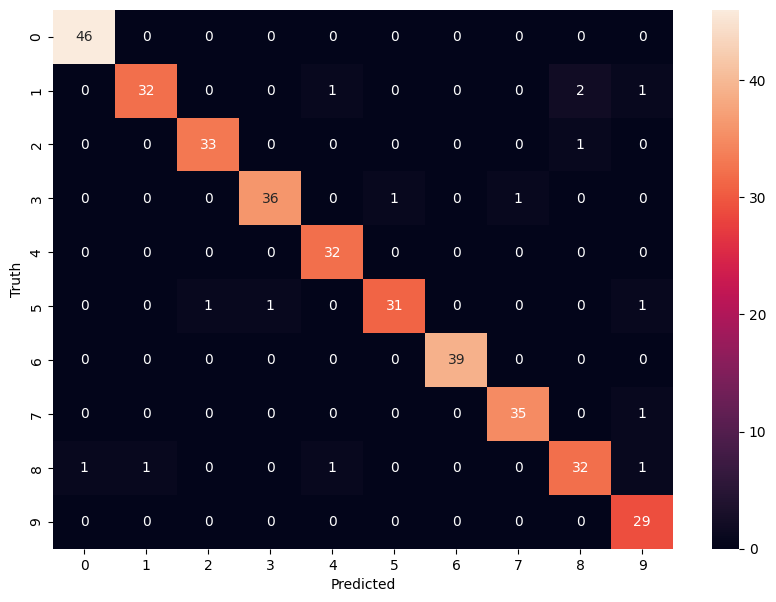

In [15]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### The actual value 2 is predicted as 2 correctly 33 times. Predicted as 8 one time (wrong prediction)

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9583333333333334


**Exercise**

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img height=300 width=300 src="iris_petal_sepal.png" />